In [4]:
from sklearn.datasets import make_regression, make_classification, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

%matplotlib inline

# Regression

## Setting up X and y

In [5]:
X, y = make_regression(n_samples=10000, n_features=20)

## Train/Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## `StandardScaler`

In [7]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Keras Model

In [8]:
X_train.shape

(7500, 20)

In [12]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=20)) # input_dim = num features. First time only
model.add(Dense(1)) # Activation = None (default) for regression

## Compiling

- loss function
- optimizer

In [13]:
model.compile('adam', 'mean_squared_error')

## Fitting

In [22]:
model.fit(X_train, y_train, 32, 10, validation_data=(X_test, y_test))

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 2s 287us/step - loss: 0.0303 - val_loss: 0.0334
Epoch 2/10
7500/7500 [==============================] - 2s 316us/step - loss: 0.0279 - val_loss: 0.0285
Epoch 3/10
7500/7500 [==============================] - 2s 313us/step - loss: 0.0269 - val_loss: 0.0319
Epoch 4/10
7500/7500 [==============================] - 2s 272us/step - loss: 0.0264 - val_loss: 0.0260
Epoch 5/10
7500/7500 [==============================] - 2s 272us/step - loss: 0.0253 - val_loss: 0.0299
Epoch 6/10
7500/7500 [==============================] - 2s 287us/step - loss: 0.0238 - val_loss: 0.0280
Epoch 7/10
7500/7500 [==============================] - 2s 281us/step - loss: 0.0218 - val_loss: 0.0239
Epoch 8/10
7500/7500 [==============================] - 2s 289us/step - loss: 0.0204 - val_loss: 0.0196
Epoch 9/10
7500/7500 [==============================] - 2s 277us/step - loss: 0.0203 - val_loss: 0.0269
Epoch 10/10
7500

## Making predictions

In [23]:
model.predict(X_test)

array([[161.90172 ],
       [119.098495],
       [162.75127 ],
       ...,
       [-14.441406],
       [ 19.243788],
       [ 19.822529]], dtype=float32)

# Binary Classification

## Train/Test Split + Scaling

In [24]:
X, y = make_classification(n_samples=10000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Creating your model

In [31]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=20))
model.add(Dense(1, activation='sigmoid')) # Sigmoid for binary determination (classification)

## Compiling

- loss
- optimizer
- optional: metrics

In [32]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

## Fitting

In [33]:
history = model.fit(X_train, y_train, 32, 20, validation_data=(X_test, y_test))

Train on 7500 samples, validate on 2500 samples
Epoch 1/20
7500/7500 [==============================] - 4s 513us/step - loss: 0.5894 - acc: 0.7060 - val_loss: 0.4016 - val_acc: 0.8928
Epoch 2/20
7500/7500 [==============================] - 3s 338us/step - loss: 0.2932 - acc: 0.9217 - val_loss: 0.2241 - val_acc: 0.9364
Epoch 3/20
7500/7500 [==============================] - 2s 324us/step - loss: 0.1955 - acc: 0.9389 - val_loss: 0.1785 - val_acc: 0.9400
Epoch 4/20
7500/7500 [==============================] - 3s 353us/step - loss: 0.1705 - acc: 0.9396 - val_loss: 0.1662 - val_acc: 0.9420
Epoch 5/20
7500/7500 [==============================] - 2s 329us/step - loss: 0.1613 - acc: 0.9429 - val_loss: 0.1609 - val_acc: 0.9420
Epoch 6/20
7500/7500 [==============================] - 3s 341us/step - loss: 0.1564 - acc: 0.9436 - val_loss: 0.1561 - val_acc: 0.9432
Epoch 7/20
7500/7500 [==============================] - 2s 330us/step - loss: 0.1526 - acc: 0.9457 - val_loss: 0.1535 - val_acc: 0.9456


## Using `history` to plot losses

In [34]:
history.history

{'val_loss': [0.40160242643356325,
  0.22406309769153596,
  0.17847728380560876,
  0.16616127775907516,
  0.1608661392480135,
  0.15613178873956204,
  0.15353392907977104,
  0.1512816399246454,
  0.14926721935272216,
  0.1479785645723343,
  0.1470327865958214,
  0.14626447231173514,
  0.1450927046611905,
  0.14440101668089628,
  0.14463410918265582,
  0.14406975906193256,
  0.14468878647834063,
  0.14412494501769543,
  0.14408050796836613,
  0.14402885803878307],
 'val_acc': [0.8928,
  0.9364,
  0.94,
  0.942,
  0.942,
  0.9432,
  0.9456,
  0.9468,
  0.9468,
  0.9488,
  0.948,
  0.948,
  0.9484,
  0.9484,
  0.9496,
  0.9492,
  0.9496,
  0.95,
  0.9504,
  0.95],
 'loss': [0.5893684814771016,
  0.2932032066980998,
  0.19554968009789786,
  0.17053994765281677,
  0.16126290816466013,
  0.15643622294267018,
  0.1526456489006678,
  0.14938379570345084,
  0.14671933244864147,
  0.1446723759015401,
  0.14269178240497907,
  0.14111777002811432,
  0.13998555766741436,
  0.13930997321605681,
  0.

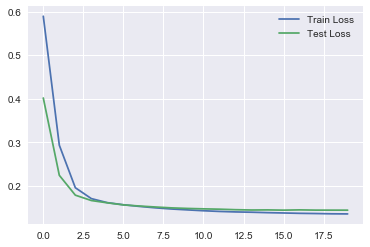

In [36]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [37]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

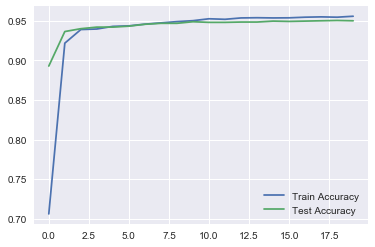

In [39]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

# Multiclass Classification

## Data Prep

In [87]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [88]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Creating your model

In [89]:
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax')) # softmax for sum of probabilites of multiclass = 1
model.add(Dense(3, activation='softmax'))

## Compiling your model

In [90]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

## Fitting

In [91]:
history = model.fit(X_train, y_train, 32, 500, validation_data=(X_test, y_test))

Train on 112 samples, validate on 38 samples
Epoch 1/500
112/112 [==============================] - 2s 20ms/step - loss: 1.1365 - acc: 0.4821 - val_loss: 1.2822 - val_acc: 0.3421
Epoch 2/500
112/112 [==============================] - 0s 442us/step - loss: 1.1319 - acc: 0.5089 - val_loss: 1.2754 - val_acc: 0.3421
Epoch 3/500
112/112 [==============================] - 0s 597us/step - loss: 1.1270 - acc: 0.5268 - val_loss: 1.2689 - val_acc: 0.3421
Epoch 4/500
112/112 [==============================] - 0s 586us/step - loss: 1.1225 - acc: 0.5357 - val_loss: 1.2627 - val_acc: 0.3421
Epoch 5/500
112/112 [==============================] - 0s 575us/step - loss: 1.1183 - acc: 0.5446 - val_loss: 1.2566 - val_acc: 0.3421
Epoch 6/500
112/112 [==============================] - 0s 615us/step - loss: 1.1140 - acc: 0.5446 - val_loss: 1.2508 - val_acc: 0.3421
Epoch 7/500
112/112 [==============================] - 0s 419us/step - loss: 1.1095 - acc: 0.5536 - val_loss: 1.2451 - val_acc: 0.3684
Epoch 8/500

Epoch 61/500
112/112 [==============================] - 0s 591us/step - loss: 0.8887 - acc: 0.6964 - val_loss: 0.9920 - val_acc: 0.5526
Epoch 62/500
112/112 [==============================] - 0s 621us/step - loss: 0.8839 - acc: 0.6964 - val_loss: 0.9874 - val_acc: 0.5526
Epoch 63/500
112/112 [==============================] - 0s 555us/step - loss: 0.8792 - acc: 0.6964 - val_loss: 0.9828 - val_acc: 0.5526
Epoch 64/500
112/112 [==============================] - 0s 467us/step - loss: 0.8744 - acc: 0.6964 - val_loss: 0.9782 - val_acc: 0.5526
Epoch 65/500
112/112 [==============================] - 0s 560us/step - loss: 0.8696 - acc: 0.6964 - val_loss: 0.9737 - val_acc: 0.5526
Epoch 66/500
112/112 [==============================] - 0s 604us/step - loss: 0.8648 - acc: 0.6964 - val_loss: 0.9691 - val_acc: 0.5526
Epoch 67/500
112/112 [==============================] - 0s 638us/step - loss: 0.8602 - acc: 0.6964 - val_loss: 0.9644 - val_acc: 0.5526
Epoch 68/500
112/112 [==========================

112/112 [==============================] - 0s 567us/step - loss: 0.6990 - acc: 0.6964 - val_loss: 0.7813 - val_acc: 0.5789
Epoch 122/500
112/112 [==============================] - 0s 605us/step - loss: 0.6972 - acc: 0.6964 - val_loss: 0.7787 - val_acc: 0.5789
Epoch 123/500
112/112 [==============================] - 0s 846us/step - loss: 0.6954 - acc: 0.6964 - val_loss: 0.7762 - val_acc: 0.5789
Epoch 124/500
112/112 [==============================] - 0s 580us/step - loss: 0.6936 - acc: 0.6964 - val_loss: 0.7738 - val_acc: 0.5789
Epoch 125/500
112/112 [==============================] - 0s 545us/step - loss: 0.6919 - acc: 0.6964 - val_loss: 0.7714 - val_acc: 0.5789
Epoch 126/500
112/112 [==============================] - 0s 608us/step - loss: 0.6901 - acc: 0.6964 - val_loss: 0.7692 - val_acc: 0.5789
Epoch 127/500
112/112 [==============================] - 0s 569us/step - loss: 0.6884 - acc: 0.6964 - val_loss: 0.7670 - val_acc: 0.5789
Epoch 128/500
112/112 [==============================] 

Epoch 181/500
112/112 [==============================] - 0s 514us/step - loss: 0.6209 - acc: 0.6964 - val_loss: 0.6764 - val_acc: 0.5789
Epoch 182/500
112/112 [==============================] - 0s 536us/step - loss: 0.6199 - acc: 0.6964 - val_loss: 0.6751 - val_acc: 0.5789
Epoch 183/500
112/112 [==============================] - 0s 590us/step - loss: 0.6190 - acc: 0.6964 - val_loss: 0.6738 - val_acc: 0.5789
Epoch 184/500
112/112 [==============================] - 0s 664us/step - loss: 0.6180 - acc: 0.6964 - val_loss: 0.6726 - val_acc: 0.5789
Epoch 185/500
112/112 [==============================] - 0s 586us/step - loss: 0.6172 - acc: 0.6964 - val_loss: 0.6715 - val_acc: 0.5789
Epoch 186/500
112/112 [==============================] - 0s 521us/step - loss: 0.6162 - acc: 0.6964 - val_loss: 0.6704 - val_acc: 0.5789
Epoch 187/500
112/112 [==============================] - 0s 496us/step - loss: 0.6154 - acc: 0.6964 - val_loss: 0.6691 - val_acc: 0.5789
Epoch 188/500
112/112 [==================

Epoch 241/500
112/112 [==============================] - 0s 482us/step - loss: 0.5762 - acc: 0.7054 - val_loss: 0.6195 - val_acc: 0.5789
Epoch 242/500
112/112 [==============================] - 0s 523us/step - loss: 0.5757 - acc: 0.7054 - val_loss: 0.6185 - val_acc: 0.5789
Epoch 243/500
112/112 [==============================] - 0s 503us/step - loss: 0.5751 - acc: 0.7054 - val_loss: 0.6178 - val_acc: 0.5789
Epoch 244/500
112/112 [==============================] - 0s 592us/step - loss: 0.5745 - acc: 0.7054 - val_loss: 0.6170 - val_acc: 0.5789
Epoch 245/500
112/112 [==============================] - 0s 513us/step - loss: 0.5739 - acc: 0.7054 - val_loss: 0.6162 - val_acc: 0.5789
Epoch 246/500
112/112 [==============================] - 0s 494us/step - loss: 0.5734 - acc: 0.7054 - val_loss: 0.6154 - val_acc: 0.5789
Epoch 247/500
112/112 [==============================] - 0s 516us/step - loss: 0.5728 - acc: 0.7054 - val_loss: 0.6146 - val_acc: 0.5789
Epoch 248/500
112/112 [==================

Epoch 301/500
112/112 [==============================] - 0s 737us/step - loss: 0.5462 - acc: 0.7232 - val_loss: 0.5841 - val_acc: 0.5789
Epoch 302/500
112/112 [==============================] - 0s 921us/step - loss: 0.5458 - acc: 0.7232 - val_loss: 0.5839 - val_acc: 0.5789
Epoch 303/500
112/112 [==============================] - 0s 565us/step - loss: 0.5454 - acc: 0.7232 - val_loss: 0.5834 - val_acc: 0.5789
Epoch 304/500
112/112 [==============================] - 0s 525us/step - loss: 0.5449 - acc: 0.7232 - val_loss: 0.5829 - val_acc: 0.5789
Epoch 305/500
112/112 [==============================] - 0s 585us/step - loss: 0.5445 - acc: 0.7232 - val_loss: 0.5823 - val_acc: 0.5789
Epoch 306/500
112/112 [==============================] - 0s 496us/step - loss: 0.5441 - acc: 0.7232 - val_loss: 0.5818 - val_acc: 0.5789
Epoch 307/500
112/112 [==============================] - 0s 701us/step - loss: 0.5436 - acc: 0.7232 - val_loss: 0.5812 - val_acc: 0.5789
Epoch 308/500
112/112 [==================

Epoch 361/500
112/112 [==============================] - 0s 566us/step - loss: 0.5225 - acc: 0.7500 - val_loss: 0.5591 - val_acc: 0.5789
Epoch 362/500
112/112 [==============================] - 0s 906us/step - loss: 0.5221 - acc: 0.7500 - val_loss: 0.5588 - val_acc: 0.5789
Epoch 363/500
112/112 [==============================] - 0s 716us/step - loss: 0.5218 - acc: 0.7500 - val_loss: 0.5584 - val_acc: 0.5789
Epoch 364/500
112/112 [==============================] - 0s 640us/step - loss: 0.5214 - acc: 0.7500 - val_loss: 0.5582 - val_acc: 0.5789
Epoch 365/500
112/112 [==============================] - 0s 620us/step - loss: 0.5210 - acc: 0.7500 - val_loss: 0.5580 - val_acc: 0.5789
Epoch 366/500
112/112 [==============================] - 0s 534us/step - loss: 0.5207 - acc: 0.7500 - val_loss: 0.5576 - val_acc: 0.5789
Epoch 367/500
112/112 [==============================] - 0s 546us/step - loss: 0.5203 - acc: 0.7500 - val_loss: 0.5575 - val_acc: 0.5789
Epoch 368/500
112/112 [==================

Epoch 421/500
112/112 [==============================] - 0s 500us/step - loss: 0.5009 - acc: 0.8036 - val_loss: 0.5359 - val_acc: 0.6316
Epoch 422/500
112/112 [==============================] - 0s 509us/step - loss: 0.5006 - acc: 0.8036 - val_loss: 0.5356 - val_acc: 0.6316
Epoch 423/500
112/112 [==============================] - 0s 437us/step - loss: 0.5002 - acc: 0.8036 - val_loss: 0.5353 - val_acc: 0.6316
Epoch 424/500
112/112 [==============================] - 0s 464us/step - loss: 0.4999 - acc: 0.8036 - val_loss: 0.5348 - val_acc: 0.6579
Epoch 425/500
112/112 [==============================] - 0s 439us/step - loss: 0.4995 - acc: 0.8036 - val_loss: 0.5341 - val_acc: 0.6579
Epoch 426/500
112/112 [==============================] - 0s 477us/step - loss: 0.4992 - acc: 0.8036 - val_loss: 0.5332 - val_acc: 0.6579
Epoch 427/500
112/112 [==============================] - 0s 449us/step - loss: 0.4988 - acc: 0.8036 - val_loss: 0.5326 - val_acc: 0.6579
Epoch 428/500
112/112 [==================

112/112 [==============================] - 0s 591us/step - loss: 0.4794 - acc: 0.8393 - val_loss: 0.5096 - val_acc: 0.7632
Epoch 481/500
112/112 [==============================] - 0s 614us/step - loss: 0.4791 - acc: 0.8393 - val_loss: 0.5093 - val_acc: 0.7632
Epoch 482/500
112/112 [==============================] - 0s 536us/step - loss: 0.4787 - acc: 0.8393 - val_loss: 0.5089 - val_acc: 0.7632
Epoch 483/500
112/112 [==============================] - 0s 518us/step - loss: 0.4783 - acc: 0.8482 - val_loss: 0.5087 - val_acc: 0.7368
Epoch 484/500
112/112 [==============================] - 0s 537us/step - loss: 0.4780 - acc: 0.8482 - val_loss: 0.5082 - val_acc: 0.7632
Epoch 485/500
112/112 [==============================] - 0s 478us/step - loss: 0.4776 - acc: 0.8482 - val_loss: 0.5074 - val_acc: 0.7632
Epoch 486/500
112/112 [==============================] - 0s 594us/step - loss: 0.4772 - acc: 0.8482 - val_loss: 0.5070 - val_acc: 0.7632
Epoch 487/500
112/112 [==============================] 

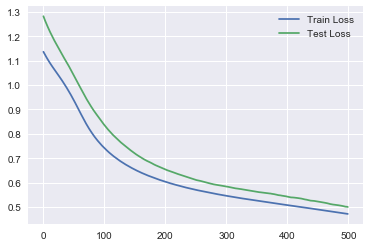

In [92]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

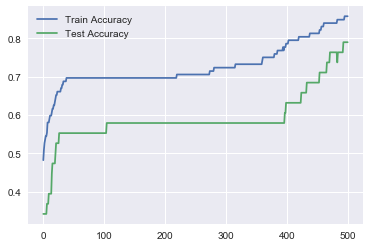

In [93]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

In [ ]:
model.predict_proba(X_test)